# Final Project - House Sales Regression

Austin Mallie, Cynthia Portales-Loebell, Celina Velazquez
Shiley-Marcos School of Engineering, University of San Diego
ADS-500B Data Science Programming
Dr. Mohammad Yavarimanesh

This project is a linear regression analysis for house sales data in King County, Washington from May 2014 to May 2015.

This section imports the libraries that are needed.

In [6]:
import os
import pandas as pd
import numpy as np
import sklearn

##1. Data Importing and Pre-Processing
### Exploratory Data Analysis
Descriptive statistics

Feature Selection
Determine correlation to identify multicollinearity

Clean date field by determining the length of the field to determine if it is consistent, then trimming the last # characters. Manage blanks in bedrooms, bathrooms, sqft_living, sqft_lot field, need to know scale of condition variable (i.e. is 5 good or bad?). Need to understand difference between sqft_living, sqft_lot, sqft_living15, sqft_lot15. 

Determine the current working directory.

In [7]:
os.getcwd()

'C:\\Users\\eport\\Documents\\ADS500B\\GitHub_project\\house_sales_regression'

Import the data file and display the records.

In [8]:
sales = pd.read_csv("house_sales.csv")
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Display the dimensions of the dataframe. There are 21613 records and 21 columns.

In [9]:
sales.shape

(21613, 21)

Display data types for columns in dataframe. There are 12 int64 (i.e. integer) variables, 8 float64 (i.e. continuous variables), and one object (i.e. string) variable. The date field is a string variable which has been imported as the incorrect type, and requires cleaning.

In [10]:
sales.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Calculate summary statistics for the dataset.

In [11]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Calculate the number of null values in each field.

In [12]:
sales.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Remove the extra characters from the date field.

In [13]:
sales['date'].str[:-7]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

Format the date field as a date data type.

In [14]:
sales['date'] = pd.to_datetime(sales['date'])

Confirm the change by checking data type of date field. The change is confirmed.

In [15]:
sales.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Create a Pearson Correlation Coefficient matrix to determine whether there is multicollinearity between variables to determine feature selection. Variables that are highly correlated will be analyzed for removal.

In [16]:
sales.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.003478,0.002095,-0.011733,-0.133237,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.014810,-0.034700,-0.033861,0.005438,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.310823,0.526600,0.701579,0.088422,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.003478,-0.014810,0.310823,1.000000,0.515814,0.575974,0.028413,0.178472,-0.004474,0.082579,...,0.359268,0.478380,0.302168,0.156249,0.019990,-0.154337,-0.009264,0.130509,0.392849,0.025323
bathrooms,0.002095,-0.034700,0.526600,0.515814,1.000000,0.754229,0.086867,0.501394,0.068412,0.186092,...,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.011733,-0.033861,0.701579,0.575974,0.754229,1.000000,0.168363,0.355316,0.107053,0.284038,...,0.763833,0.875966,0.432535,0.319783,0.057034,-0.199637,0.051092,0.239572,0.756901,0.181697
sqft_lot,-0.133237,0.005438,0.088422,0.028413,0.086867,0.168363,1.000000,-0.005682,0.021173,0.074342,...,0.111713,0.181152,0.015569,0.052165,0.008996,-0.131311,-0.087750,0.229369,0.145112,0.728800
floors,0.018525,-0.022491,0.256794,0.178472,0.501394,0.355316,-0.005682,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.004474,0.068412,0.107053,0.021173,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.082579,0.186092,0.284038,0.074342,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


The *sqft_living* and *sqft_lot field* appear to be very similar to the *sqft_living15* and *sqft_lot15* fields. According to the Pearson Correlation Coefficient matrix, the correlation between *sqft_living* and *sqft_living15* is 0.756901. Similarly, the correlation coefficient between *sqft_lot field* and *sqft_lot15* is 0.728800. According to Pennsylvania State University (2018), "multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated with one another". In addition, a correlation coefficient of .8 or higher indicates multicollinearity. The values of ~.76 and ~.73 indicate moderate to high multicollinearity, and, as a result, these variables will be dropped.

In [17]:
sales1 = sales.drop(['sqft_living15', 'sqft_lot15'], axis=1)
sales1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In the next step, *bathrooms*, *grade*, and *sqft_above* have correlation coefficients of 0.754229, 0.763833, and 0.875966, respectively, with *sqft_living*. This indicates the presence of multicollinearity with this variable. In this model, we will remove these variables, however, it would be beneficial to test a separate model using these variables in place of sqft_living to compare models.

In addition, because a geospatial analysis is not part of this study, the *lat* and *long* variables will be removed.

Categorical variables (i.e. *id*, *date*, *zipcode*) and the *date* field will also be removed in the next step since these values are not valid in a regression analysis.

In [18]:
sales2 = sales1.drop(['bathrooms', 'grade', 'sqft_above', 'lat', 'long', 'id', 'date', 'zipcode'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_lot', ylabel='price'>,
        <Axes: xlabel='floors', ylabel='price'>,
        <Axes: xlabel='waterfront', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='condition', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>,
        <Axes: xlabel='yr_built', ylabel='price'>,
        <Axes: xlabel='yr_renovated', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_lot', ylabel='bedrooms'>,
        <Axes: xlabel='floors', ylabel='bedrooms'>,
        <Axes: xlabel='waterfront', ylabel='bedrooms'>,
        <Axes: xlabel='view', ylabel='bedrooms'>,
        <Axes: xlabel='condition', ylabel='bedrooms'>,
   

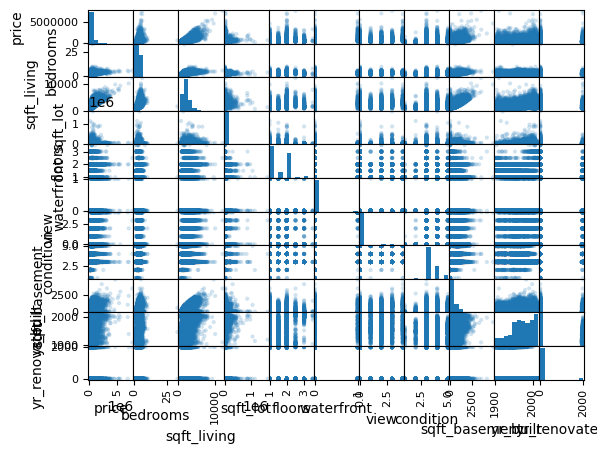

In [19]:
pd.plotting.scatter_matrix(sales2, alpha=0.2)

Construct new variable for the age of the house using the yr_built variable.

In [20]:
sales2['age'] = 2024 - sales2['yr_built']
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991,73
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0,20


Calculate recency of renovation using the yr_renovated variable if the house was renovated, otherwise, use the age of the house.

In [21]:
sales2['age_reno'] = np.where(sales['yr_renovated'] != 0, 2024 - sales2['yr_renovated'], sales2['age'])
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age,age_reno
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,1955,0,69,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,1951,1991,73,33
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,1933,0,91,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,1965,0,59,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,1987,0,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,2009,0,15,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,2014,0,10,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,2009,0,15,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,2004,0,20,20


Now that we have constructed new features using the ordinal variables *yr_built* and *yr_renovated*, we can now remove these variables. In addition, to prevent multicollinearity between the newly constructed variables, *age* and *age_reno*, *age* will be dropped, and *age_reno* will be used as a proxy.

In [22]:
sales2 = sales2.drop(['yr_built', 'yr_renovated', 'age'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,33
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,20


### Handle Missing Data

There are three remaining variables (i.e. bedrooms, 
sqft_livg, 0
sqft_0 that have missing data. The missing data represent ~5% of the total number of records. Despite the low incidence, we populate the missing values.44)

In [23]:
sales2[['bedrooms', 'sqft_living', 'sqft_lot']].isnull().sum()/21613

bedrooms       0.052468
sqft_living    0.051358
sqft_lot       0.048304
dtype: float64

Calculate summary statistics for the variables that have missing values.

In [24]:
sales2[['bedrooms', 'sqft_living', 'sqft_lot']].describe()

,bedrooms,sqft_living,sqft_lot
count,20479.000000,20503.000000,2.056900e+04
mean,3.372821,2081.073697,1.517982e+04
std,0.930711,915.043176,4.148617e+04
min,0.000000,290.000000,5.200000e+02
25%,3.000000,1430.000000,5.040000e+03
50%,3.000000,1920.000000,7.620000e+03
75%,4.000000,2550.000000,1.070800e+04
max,33.000000,12050.000000,1.651359e+06


Visualize the summary statistics with boxplots.

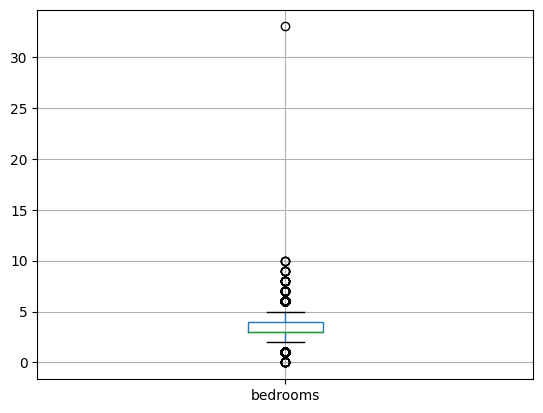

In [25]:
boxplot_bed = sales2.boxplot(column=['bedrooms']) 

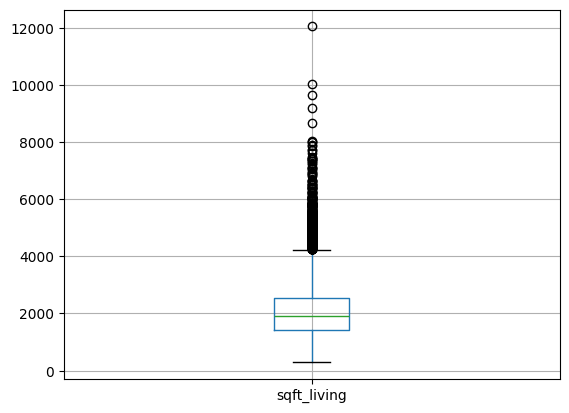

In [26]:
boxplot_liv = sales2.boxplot(column=['sqft_living']) 

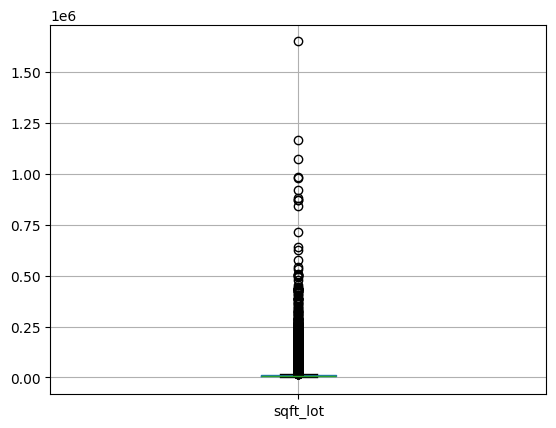

In [27]:
boxplot_lot = sales2.boxplot(column=['sqft_lot']) 

To determine how to replace the null values in the bedrooms field, we consider that we can use mean, median, or mode. However, there is a large outlier that would impact the mean. We inspect this outlier to determine if it is valid or should be adjusted or removed.

To determine how to handle the outlier in *bedrooms*, we will display the record that has the outlier of 33 bedrooms to determine if the price aligns with the extreme number of bedrooms or if it could be a data entry error.

The price of $640,000 is around the 75th percentile. Intuition tells us that a higher number of bedrooms is correlated with a higher price, and the price seems to not align with 33 bedrooms.

In [28]:
sales2.loc[sales2['bedrooms'] == 33]

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
15870,640000.0,33.0,1620.0,6000.0,1.0,0,0,5,580,77


To understand the number of bedrooms associated with the houses sold at the highest prices, we display the records that are greater than $7,000,000.

We find that there are two houses in this category, and they have five and six rooms each.

In [29]:
sales2.loc[sales2['price'] > 7000000]

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
3914,7062500.0,5.0,10040.0,37325.0,2.0,1,2,3,2360,23
7252,7700000.0,6.0,12050.0,27600.0,2.5,0,3,4,3480,37


Given the discord between the price and the number of rooms, it appears that the number of bedrooms is a data entry error. We will replace this value with the most common number of bedrooms (i.e. the mode) for houses that cost between \$600,000 and \$700,000 since prices are correlated with number of bedrooms. The mode for this price range is four.

In [30]:
mean_600k = sales2.loc[(sales2['price'] >= 600000) & (sales2['price'] <= 700000)]
mean_600k['bedrooms'].mode()

0    4.0
Name: bedrooms, dtype: float64

Replace the outlier of 33 bedrooms with the mode of 4.

In [31]:
sales2['bedrooms'] = np.where(sales2['bedrooms'] == 33, 4, sales2['bedrooms'])
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,221900.0,3.0,1180.0,5650.0,1.0,0,0,3,0,69
1,538000.0,3.0,2570.0,7242.0,2.0,0,0,3,400,33
2,180000.0,2.0,770.0,10000.0,1.0,0,0,3,0,91
3,604000.0,4.0,1960.0,5000.0,1.0,0,0,5,910,59
4,510000.0,3.0,1680.0,8080.0,1.0,0,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,1530.0,1131.0,3.0,0,0,3,0,15
21609,400000.0,4.0,2310.0,5813.0,2.0,0,0,3,0,10
21610,402101.0,2.0,1020.0,1350.0,2.0,0,0,3,0,15
21611,400000.0,3.0,1600.0,2388.0,2.0,0,0,3,0,20


In [32]:
sales2.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
count,2.161300e+04,20479.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.371405,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,291.509045,50.613982
std,3.671272e+05,0.907401,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,442.575043,28.806854
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000
25%,3.219500e+05,3.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,25.000000
50%,4.500000e+05,3.000000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,0.000000,47.000000
75%,6.450000e+05,4.000000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,560.000000,70.000000
max,7.700000e+06,10.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,4820.000000,124.000000


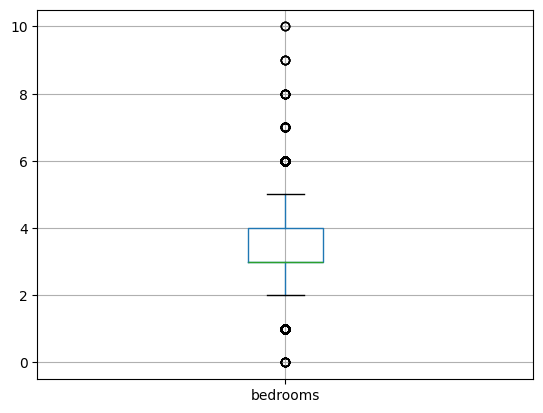

In [33]:
boxplot_bed2 = sales2.boxplot(column=['bedrooms'])

The bedrooms variable is still slightly right-skewed, so we will use the median to replace the null values.

In [34]:
sales2['bedrooms'] = np.where(sales2['bedrooms'].isnull(), 3, sales2['bedrooms'])

Check if the null values were replaced correctly.

In [35]:
sales2[['bedrooms']].isnull().sum()

bedrooms    0
dtype: int64

For *sqft_living* and *sqft_lot*, we will replace the null values with the median because both variables are right-skewed, and the median is robust to outliers.

In [36]:
sales2['sqft_living'] = np.where(sales2['sqft_living'].isnull(), 1920, sales2['sqft_living'])

In [37]:
sales2[['sqft_living']].isnull().sum()

sqft_living    0
dtype: int64

In [38]:
sales2['sqft_lot'] = np.where(sales2['sqft_lot'].isnull(), 7620, sales2['sqft_lot'])

In [39]:
sales2[['sqft_lot']].isnull().sum()

sqft_lot    0
dtype: int64

### Normalize the Data

Normalization is used when the scales of the data are very different (Bhandari, 2024). To determine if that is the case with the sales2 data, we will visualized the data with boxplots.

<Axes: >

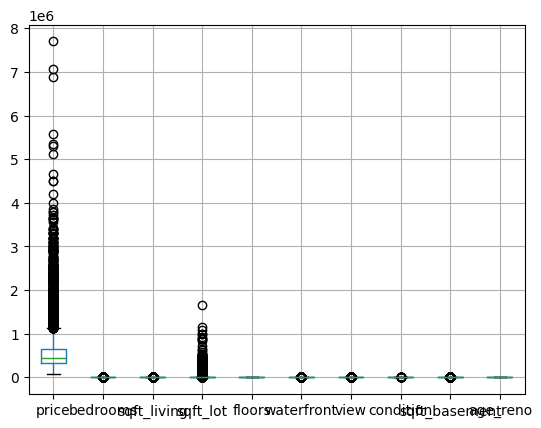

In [40]:
sales2.boxplot()

The difference in scale is evident; the distribution of some features is indiscernible due to the large difference in scale. Per Bhandari (2024), normalization and standardization are important for non-normal data that will be used in a regression analysis, and the following code comes from this source.

In [41]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(sales2)

# transform training data
sales2_norm = norm.transform(sales2)
print("Scaled Sales Data: \n\n")
print(sales2_norm)

Scaled Sales Data: 


[[0.01926557 0.3        0.07568027 ... 0.5        0.         0.52173913]
 [0.06072131 0.3        0.19387755 ... 0.5        0.08298755 0.20869565]
 [0.01377049 0.2        0.04081633 ... 0.5        0.         0.71304348]
 ...
 [0.04289849 0.2        0.06207483 ... 0.5        0.         0.05217391]
 [0.04262295 0.3        0.11139456 ... 0.5        0.         0.09565217]
 [0.03278689 0.2        0.06207483 ... 0.5        0.         0.06086957]]


Visualize the data using matplotlib since the data has changed from a Pandas dataframe to a numpy N-dimensional array (i.e. ndarray), and boxplot(), the Pandas function, no longer applies.

{'whiskers': [<matplotlib.lines.Line2D at 0x14297134200>,
 'caps': [<matplotlib.lines.Line2D at 0x1429758eed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14297134050>,
 'medians': [<matplotlib.lines.Line2D at 0x14297134bc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x14297134e90>,
 'means': []}

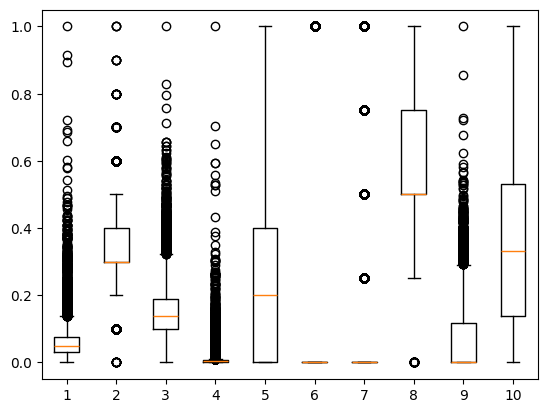

In [42]:
import matplotlib.pyplot as plt
plt.boxplot(sales2_norm)

#References

Bhandari, A. (2024, June 9). Feature scaling: Engineering, Normalization, and standardization (updated 2024). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=of%20the%20features!-,What%20is%20Normalization?,values%20of%20the%20feature%2C%20respectively. 
Pennsylvania State University. (2018). 10.4 - multicollinearity. 10.4 - Multicollinearity | STAT 462. https://online.stat.psu.edu/stat462/node/177/


<h2>Regression</h2>
We decided to use a Decision Tree Regression because it can predict continuous valued outputs instead of discrete outputs because here we are stating the probable price of a house based on a few features. They are also good for non linear data. Decision trees are susceptible to overfitting, so we will be weary of that. We chose to remove data that was categorical because this model requires numerical data.

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
X = sales2[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'age_reno']]
y = sales2['price']

In [46]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

DecisionTreeRegressor(random_state=0)

We'll use the mean absolute error (MAE) to find out how accurate this model is. It returned 1045.13, which means that on average the model's predictions are only off by $1,045, which seems really good.

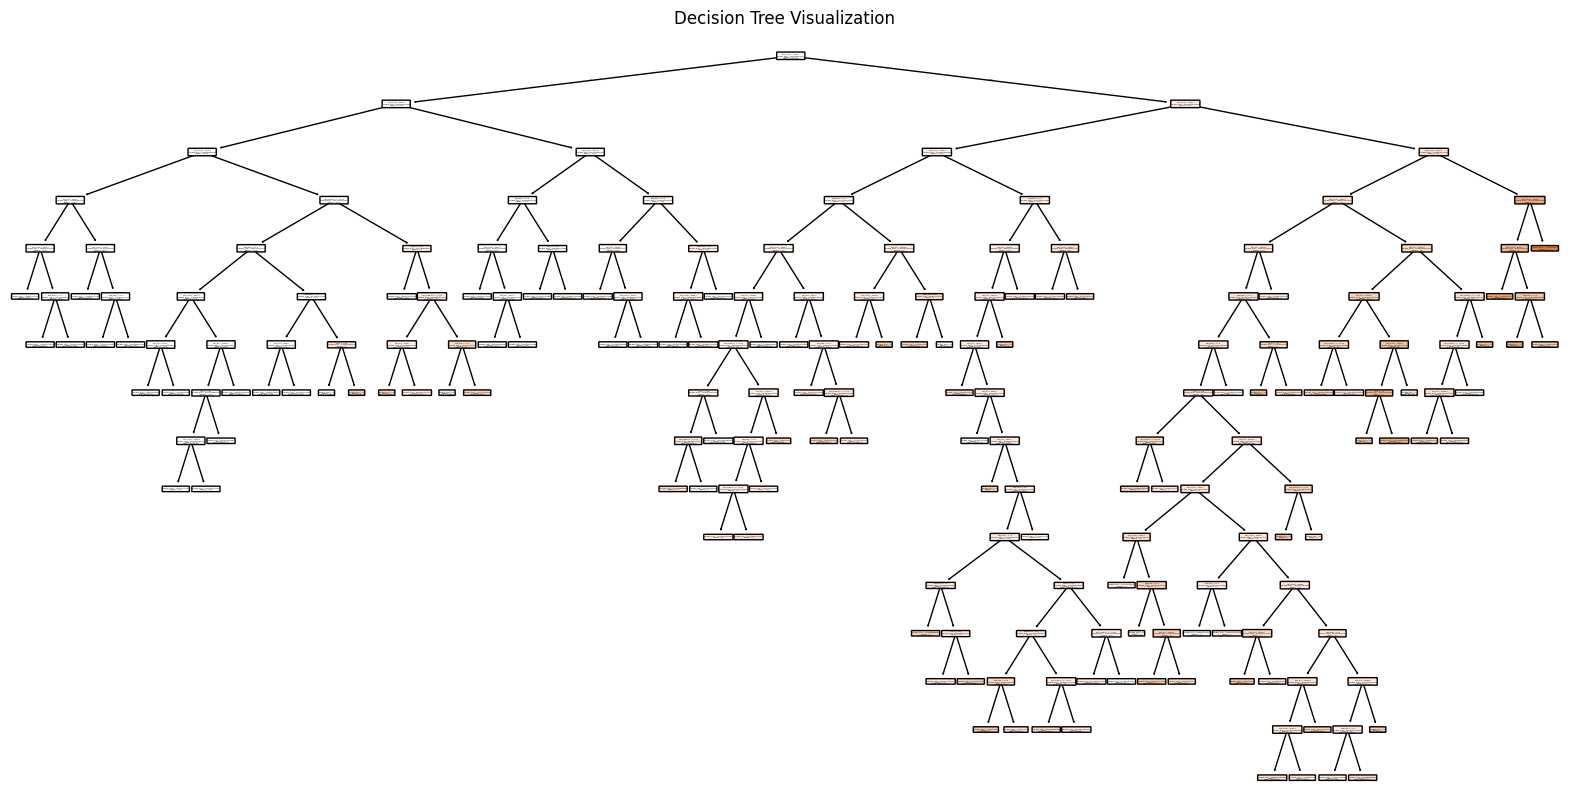

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=['Not Affordable', 'Affordable'])
plt.title('Decision Tree Visualization')
plt.show()

Before we continued working on this model we wanted to visualize the decision tree. As you can see it is rather large, so below is the tree zoomed in a bit, so you cannot see the entire tree, but you can see close up a few of the leaves and read it.

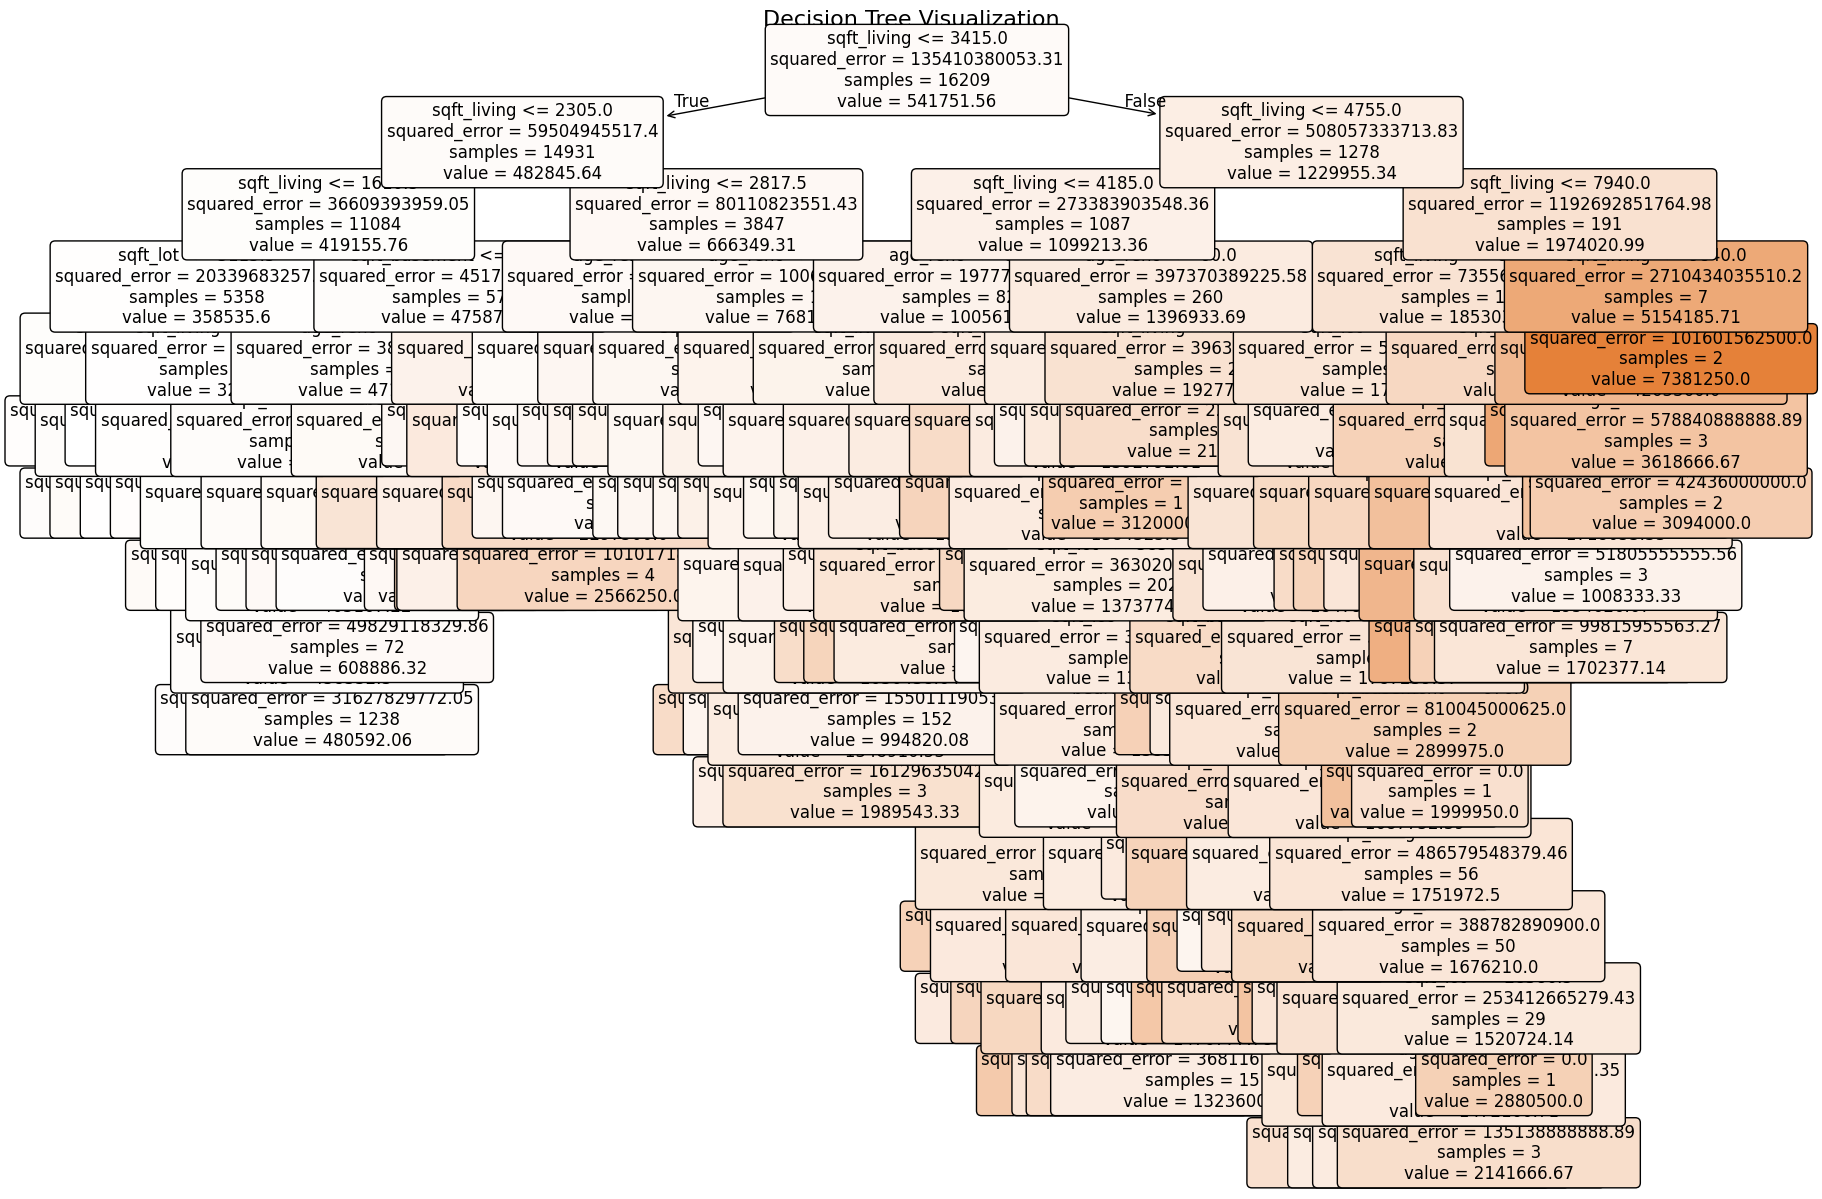

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

figsize = (20, 15)  
fontsize = 12

plt.figure(figsize=figsize) 
plot_tree(model, 
          feature_names=X.columns,  
          filled=True,
          rounded=True,
          fontsize=fontsize,
          precision=2)  

plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

We had trained the model and validated it on the same data, so instead we'll exclude some of the data from what we will use to train the model, and then test our model on that data that was excluded (validating).

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model = DecisionTreeRegressor()
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

203381.3888477671


A MAE of 203,381 is not good, so we want to optimize this model. A good way to do that is using max leaf nodes. This limits the leaves, which in turn makes sure we are not overfitting or underfitting the model.

In [53]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

We compared a few options for leaf nodes, which we found 100 leaves to be optimal because it returned the lowest MAE with 163,031.

In [54]:
for max_leaf_nodes in [5, 50, 100, 250, 500, 1000, 2500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  180191
Max leaf nodes: 50  		 Mean Absolute Error:  163825
Max leaf nodes: 100  		 Mean Absolute Error:  163031
Max leaf nodes: 250  		 Mean Absolute Error:  163465
Max leaf nodes: 500  		 Mean Absolute Error:  166396
Max leaf nodes: 1000  		 Mean Absolute Error:  173916
Max leaf nodes: 2500  		 Mean Absolute Error:  186393
Max leaf nodes: 5000  		 Mean Absolute Error:  197418


In [55]:
optimal_max_leaf_nodes = 100

model = DecisionTreeRegressor(max_leaf_nodes=optimal_max_leaf_nodes, random_state=0)

model.fit(train_X, train_y)

val_predictions = model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(f'Validation Mean Absolute Error with max_leaf_nodes={optimal_max_leaf_nodes}: {val_mae}')

Validation Mean Absolute Error with max_leaf_nodes=100: 163031.74672532897


But we want to continue optimizing the model by using a random forest which uses multiple trees to make predictions. This time it returned a MAE of 150,359, which still isn't great, but it is has at least been moving in the right direction. 

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [75]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)
house_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, house_preds))

150359.76934482832


 Actual vs. Predicted Plot - this visualization helps us to understand how well the model's predictions match the true values.

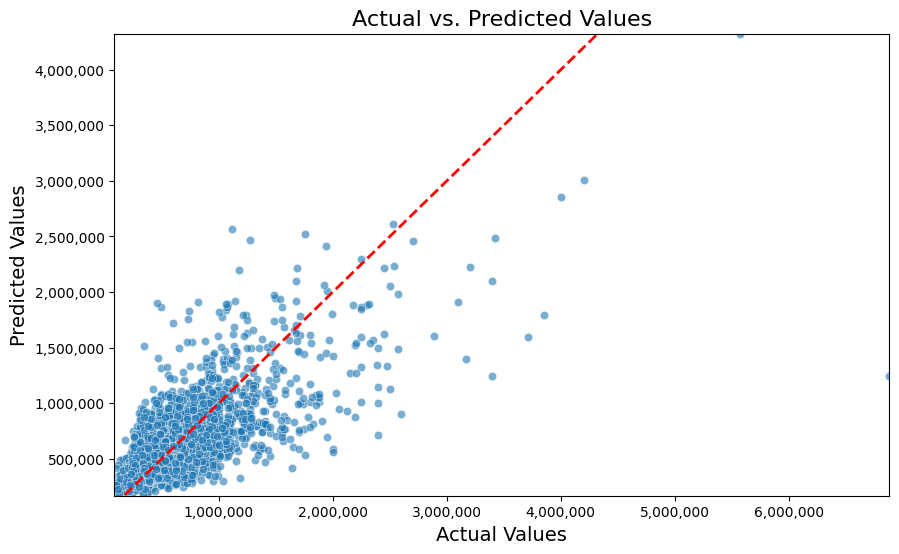

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=results_sales2, alpha=0.6)

plt.plot([results_sales2['Actual'].min(), results_sales2['Actual'].max()],
         [results_sales2['Actual'].min(), results_sales2['Actual'].max()],
         'r--', lw=2)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlim(results_sales2['Actual'].min(), results_sales2['Actual'].max())
plt.ylim(results_sales2['Predicted'].min(), results_sales2['Predicted'].max())

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)

plt.show()

One advantage of Random Forest models is their ability to compute feature importance. This can help us understand which features are driving the predictions. As we can see in the graph below that is sqft_living in our dataset.

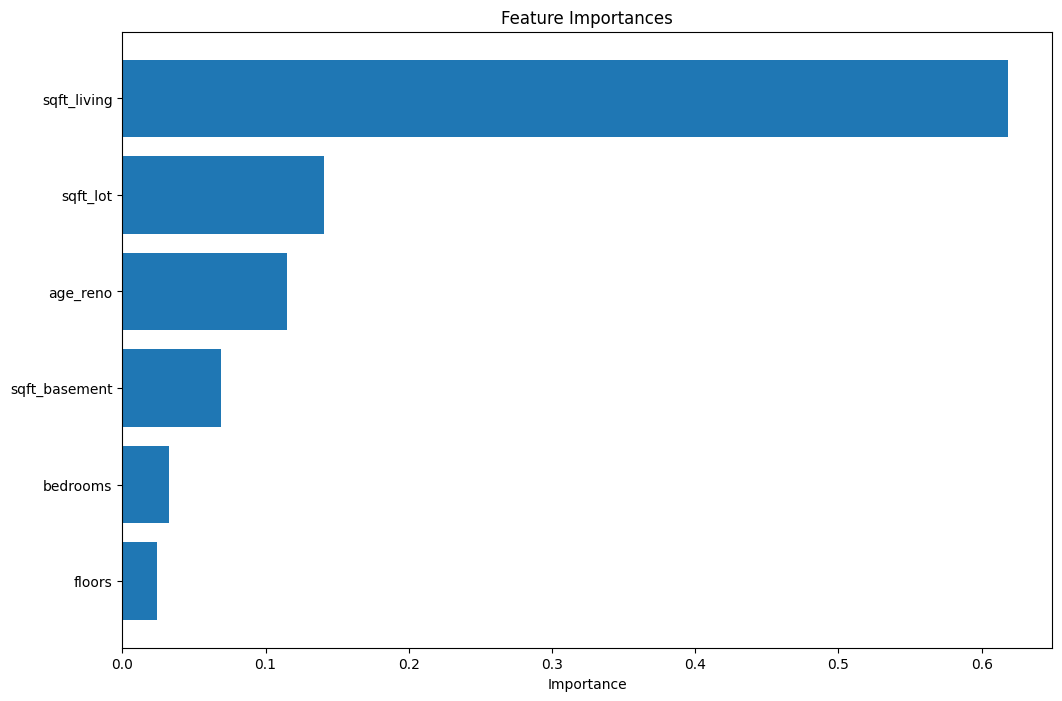

In [71]:
importances = forest_model.feature_importances_
features = train_X.columns

indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), features[indices])
plt.xlabel('Importance')
plt.show()

Feature importance